<a href="https://colab.research.google.com/github/BHARGAVCHARAN/Sentiment-analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/dataset/amazon_alexa.tsv",delimiter = '\t',quoting = 3)

print(f"dataset shape :{data.shape}")

dataset shape :(3150, 5)


In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
data.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1
3149,4,29-Jul-18,Black Dot,Good,1


In [ ]:
print(f"feature names : {data.columns.values}")

feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [ ]:
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [ ]:
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [ ]:
data.dropna(inplace = True)

In [ ]:
print(f"dataset shape after dropping null values :{data.shape}")

dataset shape after dropping null values :(3149, 5)


In [ ]:
data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
data.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64
length,int64


In [ ]:
###  rating,feedback and length are integer values

In [ ]:
### date,variation and verified_reviews are string values

In [ ]:
len(data)

3149

In [ ]:
data['rating'].value_counts()

,count
rating,
5,2286
4,455
1,161
3,152
2,95


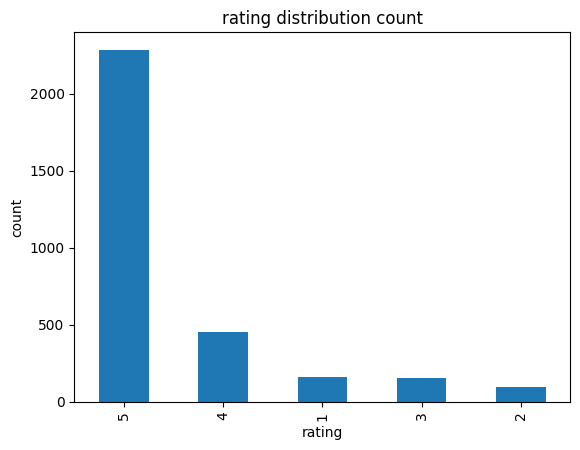

In [ ]:
data['rating'].value_counts().plot.bar()
plt.title('rating distribution count')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

In [ ]:
round(data['rating'].value_counts()/data.shape[0]*100,2)

,count
rating,
5,72.59
4,14.45
1,5.11
3,4.83
2,3.02


([<matplotlib.patches.Wedge at 0x7c9d9a9a8290>,
 [Text(-0.7168725143844202, 0.8343223586361326, '5'),
  Text(0.32799956710287353, -1.049960134471937, '4'),
  Text(0.8733843392573287, -0.6687299873192764, '1'),
  Text(1.036590872592624, -0.3680752135877424, '3'),
  Text(1.0950632799421605, -0.10409809278904968, '2')])

<Figure size 700x700 with 0 Axes>

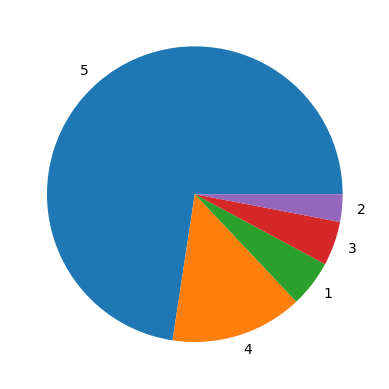

In [ ]:
fig = plt.figure(figsize=(7,7))
sizes=data['rating'].value_counts()/data.shape[0]
labels =[5,4,1,3,2]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [ ]:
data['feedback'].value_counts()

,count
feedback,
1,2893
0,256


In [ ]:
#there are two values 0 and 1

In [ ]:
review_0 = data[data['feedback']==0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [ ]:
review_1 = data[data['feedback']==1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


In [ ]:
##0 is negative review
#1 is positive review

Text(0, 0.5, 'count')

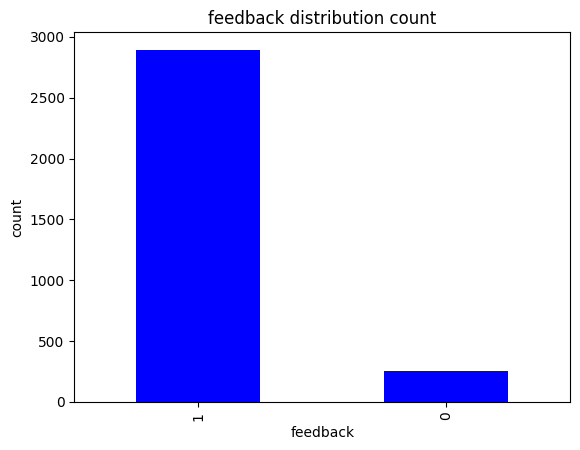

In [ ]:
data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('feedback distribution count')
plt.xlabel('feedback')
plt.ylabel('count')

In [ ]:
data['feedback'].value_counts()/data.shape[0]*100,2

(feedback
 1    91.870435
 0     8.129565
 Name: count, dtype: float64,
 2)

([<matplotlib.patches.Wedge at 0x7c9d988c2210>,
 [Text(-1.0643191887246546, 0.2778932610058999, '1'),
  Text(1.0643190805089426, -0.27789367546707394, '0')])

<Figure size 700x700 with 0 Axes>

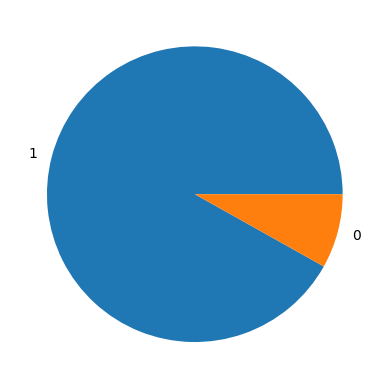

In [ ]:
fig = plt.figure(figsize=(7,7))

sizes = data['feedback'].value_counts()/data.shape[0]
labels = [1,0]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [ ]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

,count
rating,
1,161
2,95


In [ ]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

,count
rating,
5,2286
4,455
3,152


In [ ]:
###  Analyzing 'variation' column
###  This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [ ]:
data['variation'].value_counts()

,count
variation,
Black Dot,516
Charcoal Fabric,430
Configuration: Fire TV Stick,350
Black Plus,270
Black Show,265
Black,261
Black Spot,241
White Dot,184
Heather Gray Fabric,157


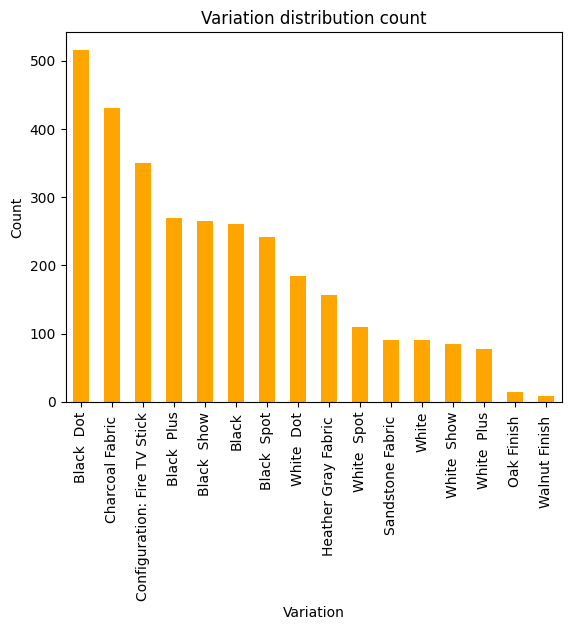

In [ ]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
round(data['variation'].value_counts()/data.shape[0]*100,2)

,count
variation,
Black Dot,16.39
Charcoal Fabric,13.66
Configuration: Fire TV Stick,11.11
Black Plus,8.57
Black Show,8.42
Black,8.29
Black Spot,7.65
White Dot,5.84
Heather Gray Fabric,4.99


In [ ]:
data.groupby('variation')['rating'].mean()

,rating
variation,
Black,4.233716
Black Dot,4.453488
Black Plus,4.370370
Black Show,4.490566
Black Spot,4.311203
Charcoal Fabric,4.730233
Configuration: Fire TV Stick,4.591429
Heather Gray Fabric,4.694268
Oak Finish,4.857143


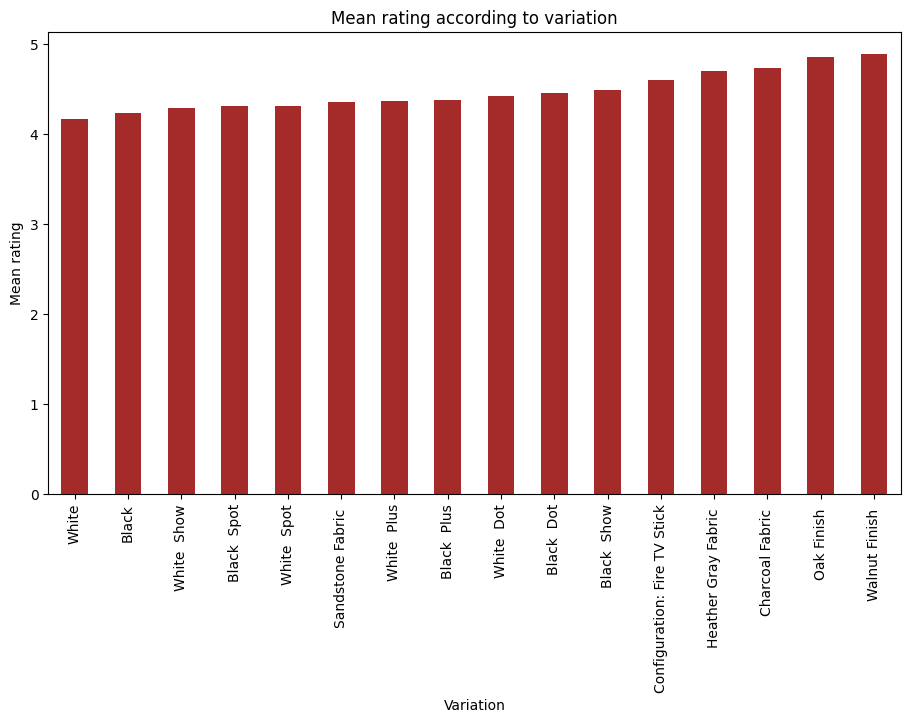

In [ ]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [ ]:
data['length'].describe()

,length
count,3149.000000
mean,132.714513
std,182.541531
min,1.000000
25%,30.000000
50%,74.000000
75%,166.000000
max,2853.000000


[Text(0.5, 1.0, 'Distribution of length of review ')]

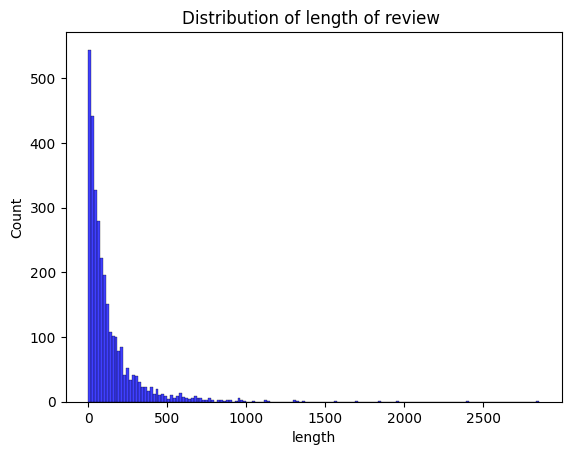

In [ ]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

In [ ]:
#preprocessing and modeling
#To build the corpus from the 'verified_reviews' we perform the following -

#Replace any non alphabet characters with a space
#Covert to lower case and split into words
#Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re  # Import the regular expression module
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords  # Assuming STOPWORDS comes from here

# Initialize stopwords and stemmer
STOPWORDS = set(stopwords.words('english'))  # Define stopwords (e.g., English stopwords)
stemmer = PorterStemmer()
corpus = []

# Process each review in the DataFrame
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [ ]:
import os
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Example: Create a CountVectorizer object
cv = CountVectorizer()

# Create Models directory if it doesn't exist
os.makedirs('Models', exist_ok=True)

# Save the object
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))
print("CountVectorizer saved to Models/countVectorizer.pkl")

CountVectorizer saved to Models/countVectorizer.pkl


In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.9428571428571428


In [ ]:
y_preds = model_rf.predict(X_test_scl)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
!pip install wordcloud

In [ ]:
cm = confusion_matrix(y_test, y_preds)

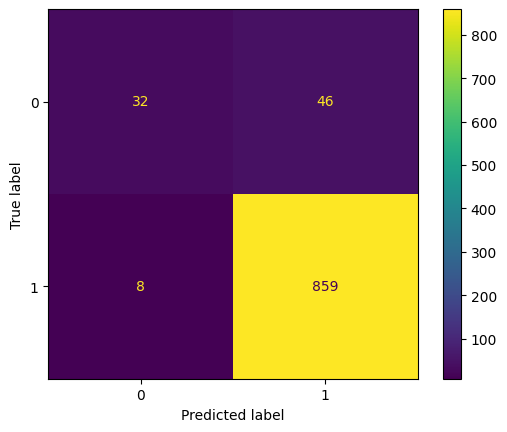

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [ ]:
#K fold cross-validation

In [ ]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9305861785273551
Standard Variance : 0.008086946672199153


In [ ]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [ ]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [ ]:
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [ ]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.78425589836661
Cross validation mean accuracy on test set : 92.1676497277677
Accuracy score for test set : 0.9428571428571428


In [ ]:
!pip install  xgboost

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9417989417989417


In [ ]:
y_preds = model_xgb.predict(X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 31  47]
 [ 13 854]]


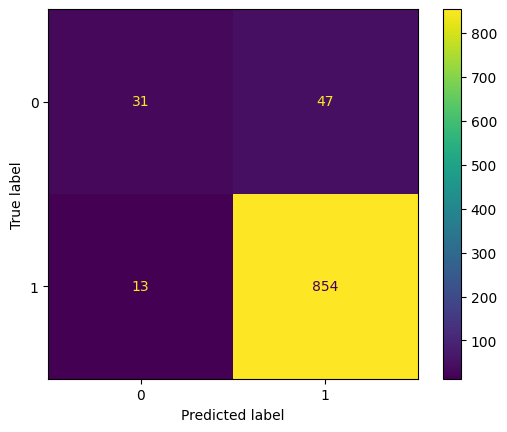

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [ ]:

print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9941016333938294
Testing Accuracy : 0.9216931216931217


In [ ]:
y_preds = model_dt.predict(X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 42  36]
 [ 83 784]]


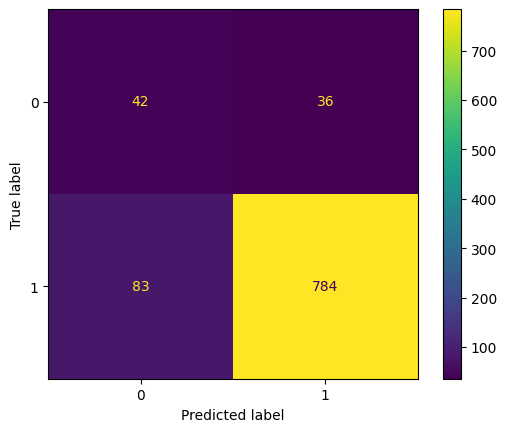

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()